<a href="https://colab.research.google.com/github/AMLU-ANNA-JOSHY/Support_Vector_Machines/blob/main/SVM_2_Kernel_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AMLU-ANNA-JOSHY/Support_Vector_Machines/blob/main/SVM_2_Kernel_Trick.ipynb)

# Kernel Trick in SVM
- To solve non-linear problems SVM utilizes the kernel trick, where a transformation
is applied to the input data, which maps it to a higher-dimensional space where
they are linearly separable.
- When the data cannot be separated by a straight line, the kernel function transforms it into a higher-dimensional space where a linear separator (hyperplane) can be found.

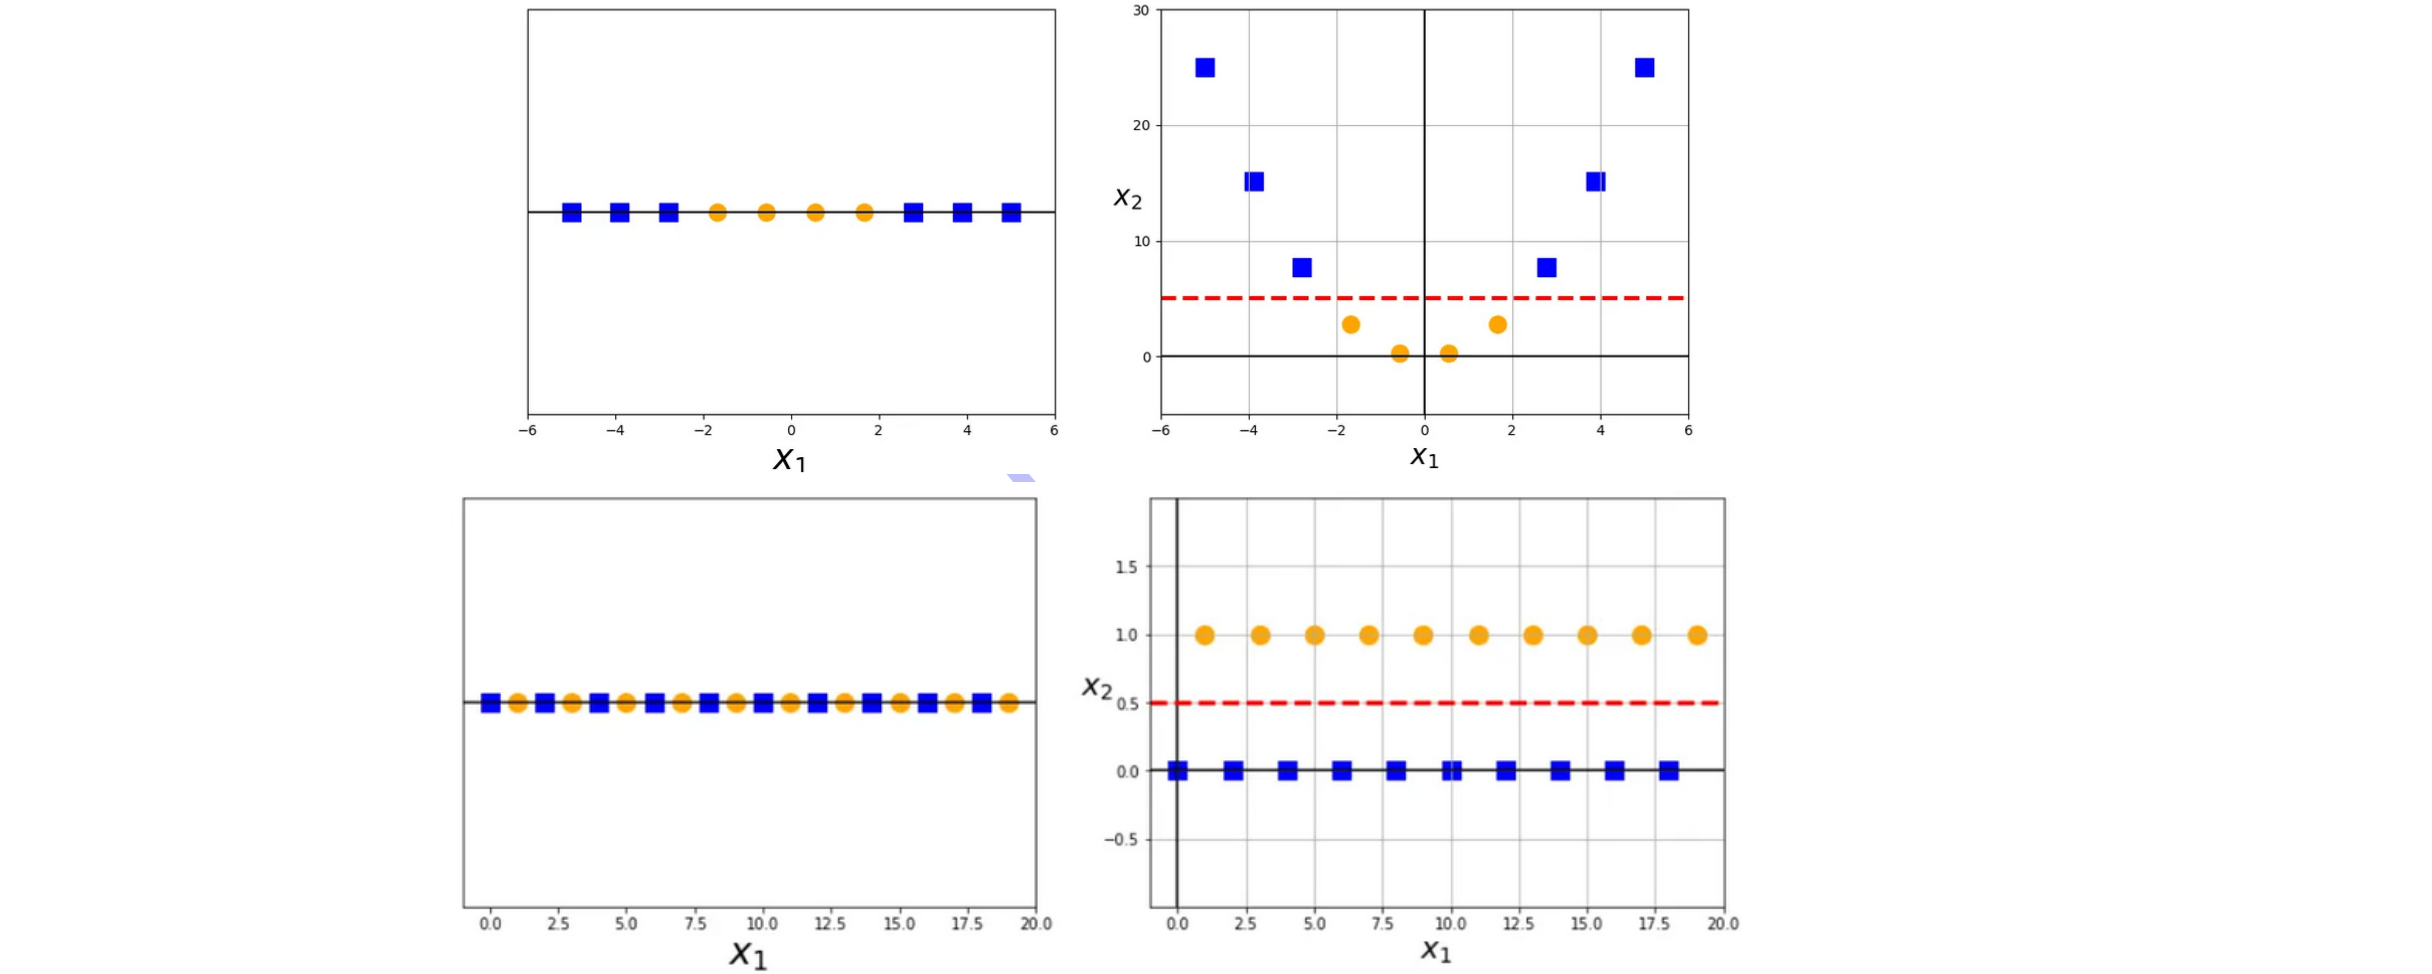

- Fig 1: x2 = sq(x1)
- Fig 2: x2 = x1 mod 2

Ref [1]: https://medium.com/data-science/the-kernel-trick-c98cdbcaeb3f

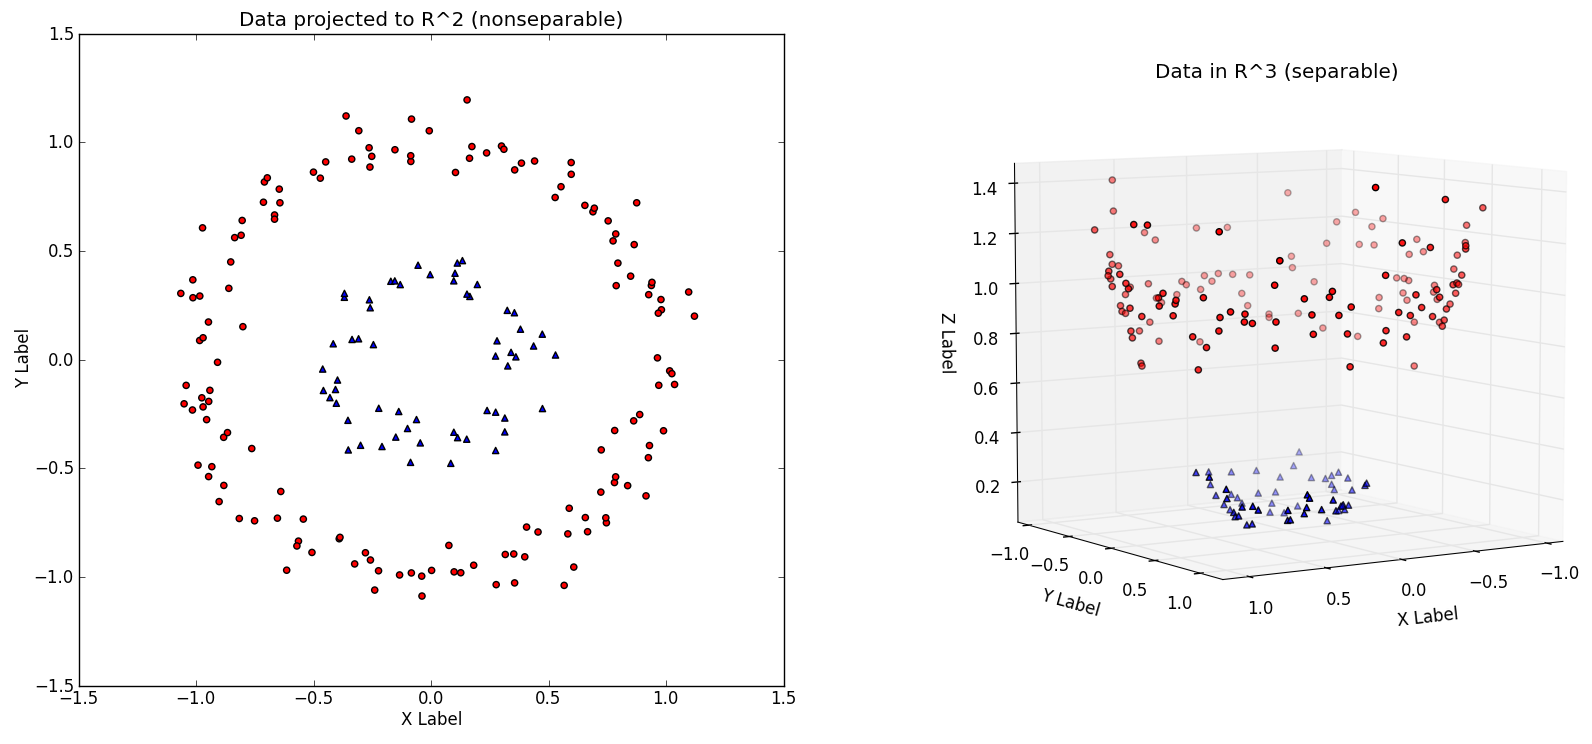

- A non-linearly separable dataset  transformed by the transformation: $[x_1, x_2] = [x_1, x_2, {x_1}^2 + {x_2}^2]$

Ref: https://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html

- There can be many transformations that allow the data to be linearly separated
in higher dimensions, but not all of these functions are actually kernels.
- The kernel function has a special property that makes it particularly useful in
training support vector models, and the use of this property in optimizing
non-linear support vector classifiers is often called the **kernel trick** [1].

- Instead of explicitly calculating the coordinates in the higher dimension, **it computes the dot products between data points**, saving significant computational costs.
- **SVM optimization depends only on dot products**, so we replace them with a kernel function.

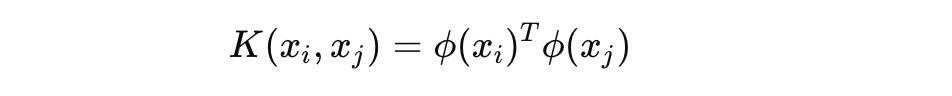

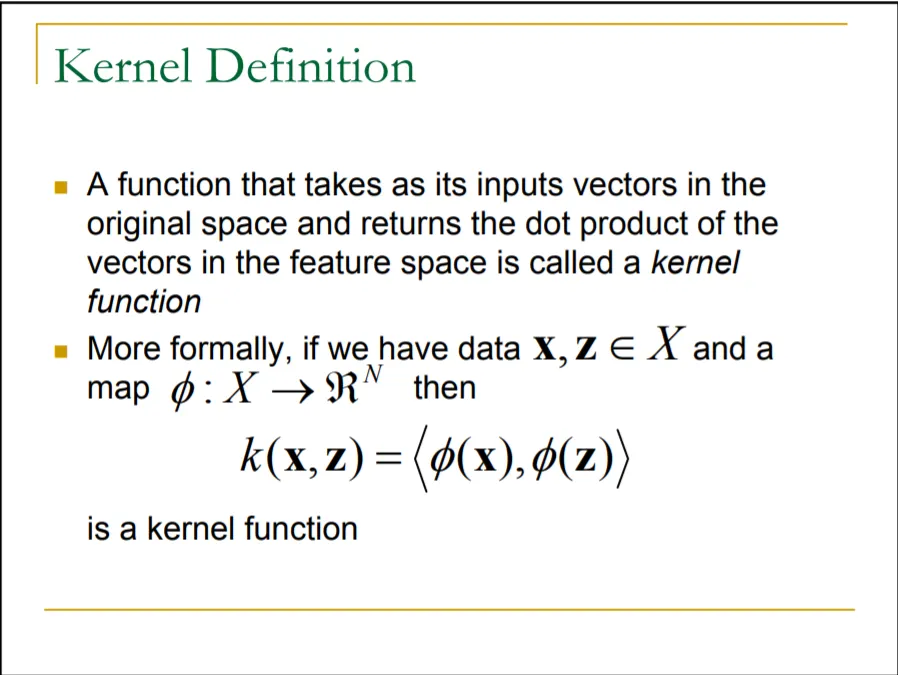

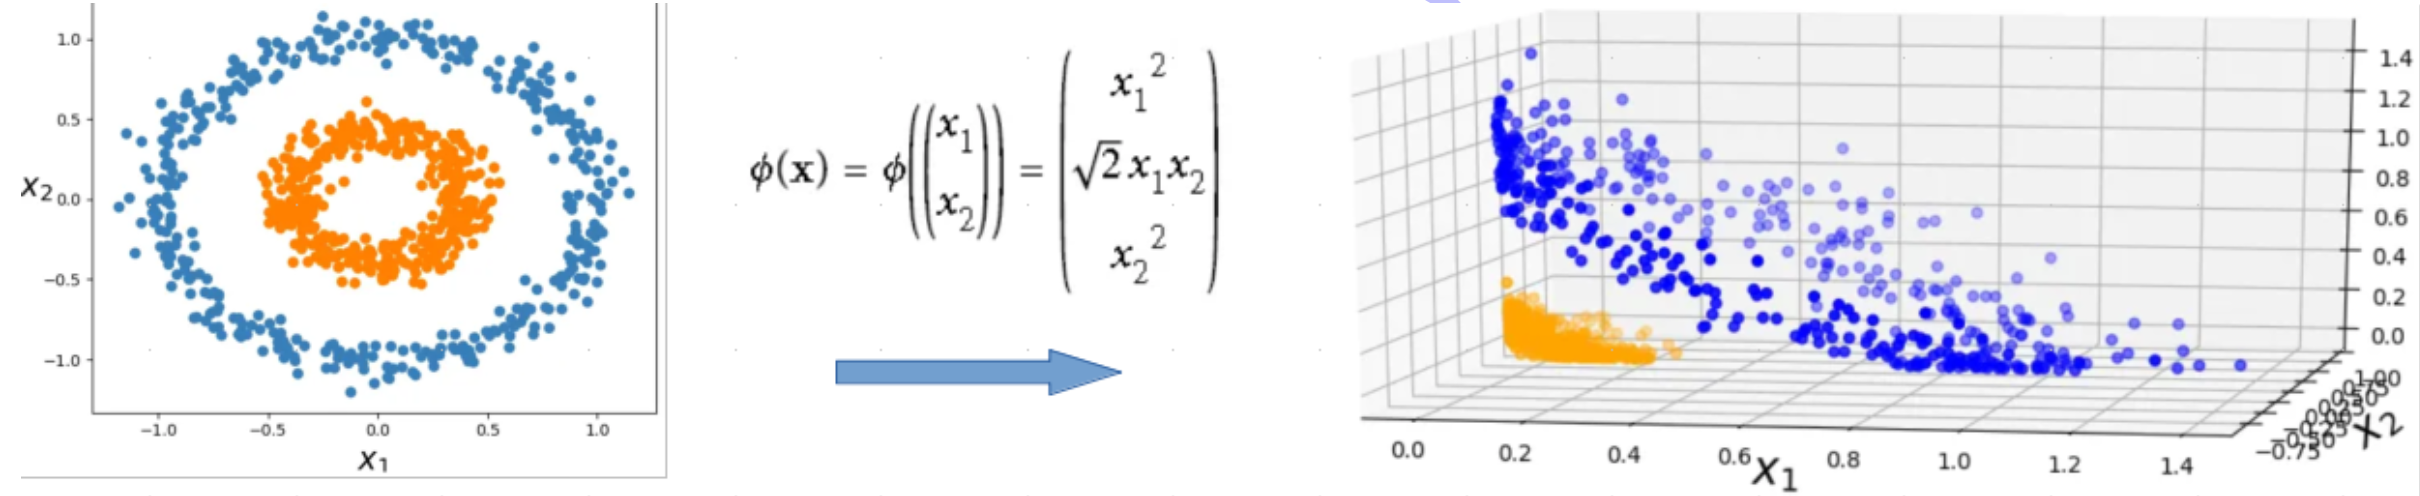

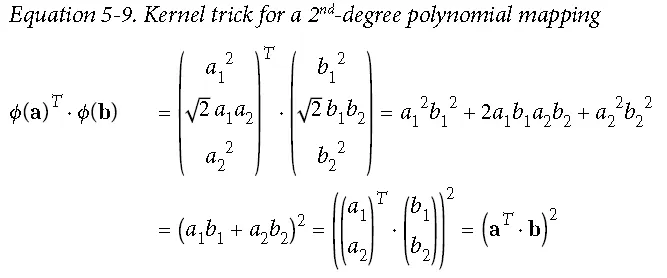

Ref: [1]

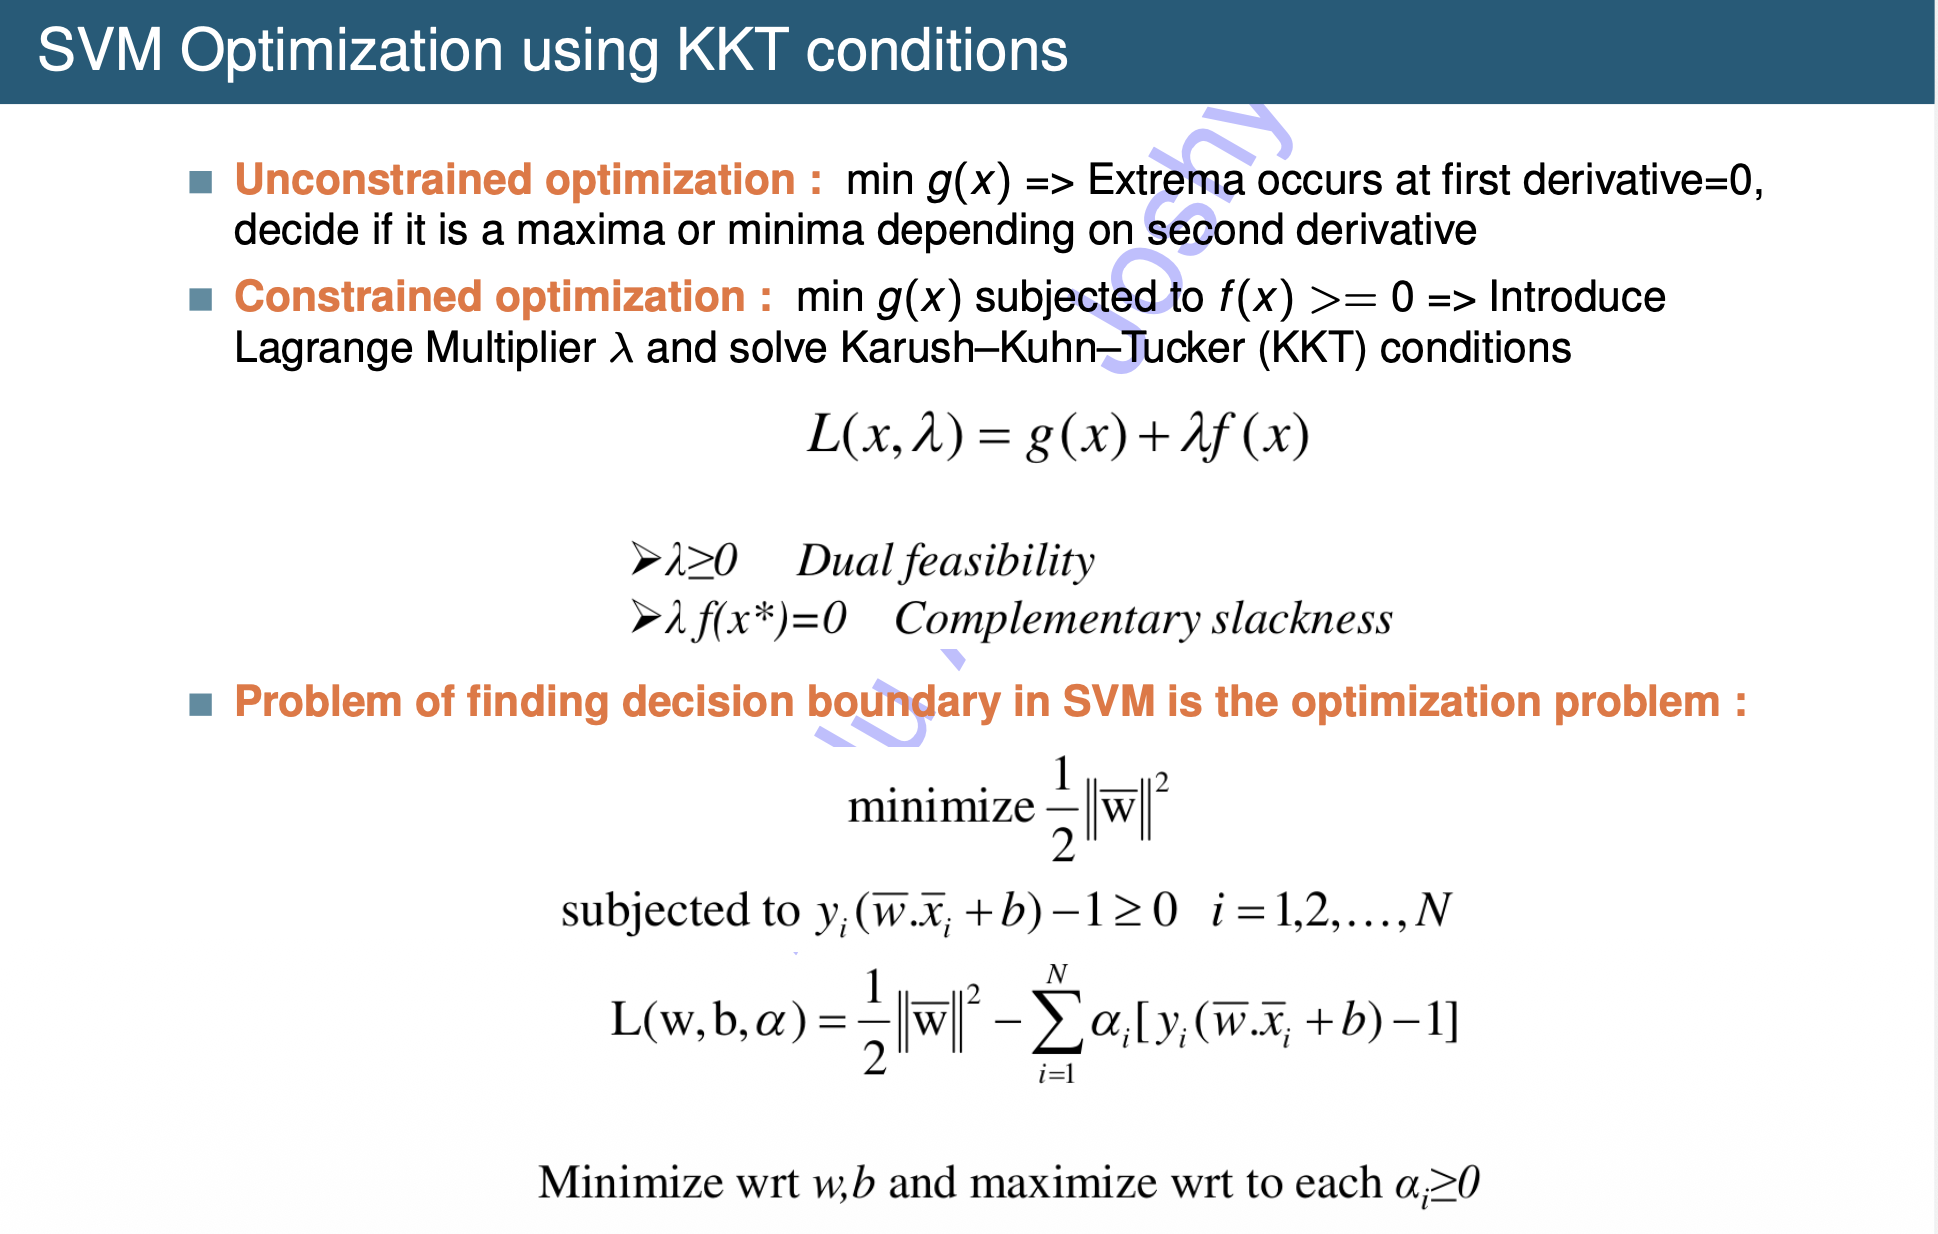

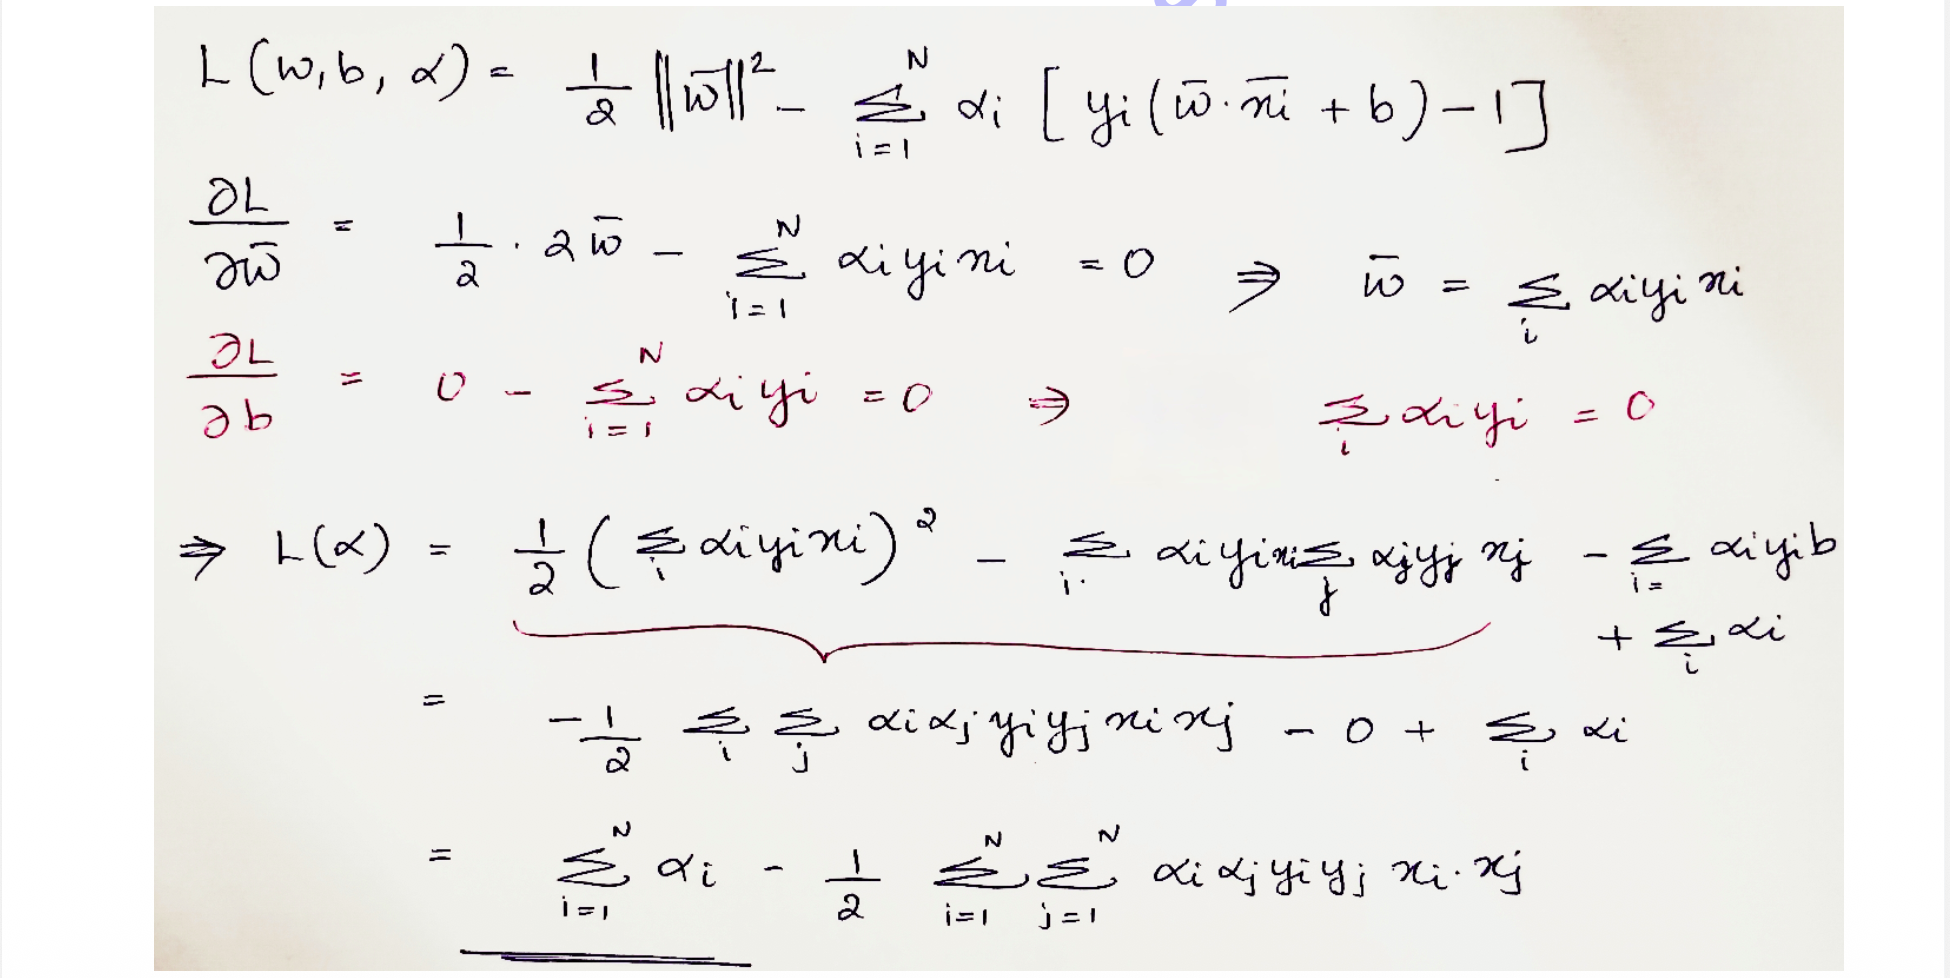

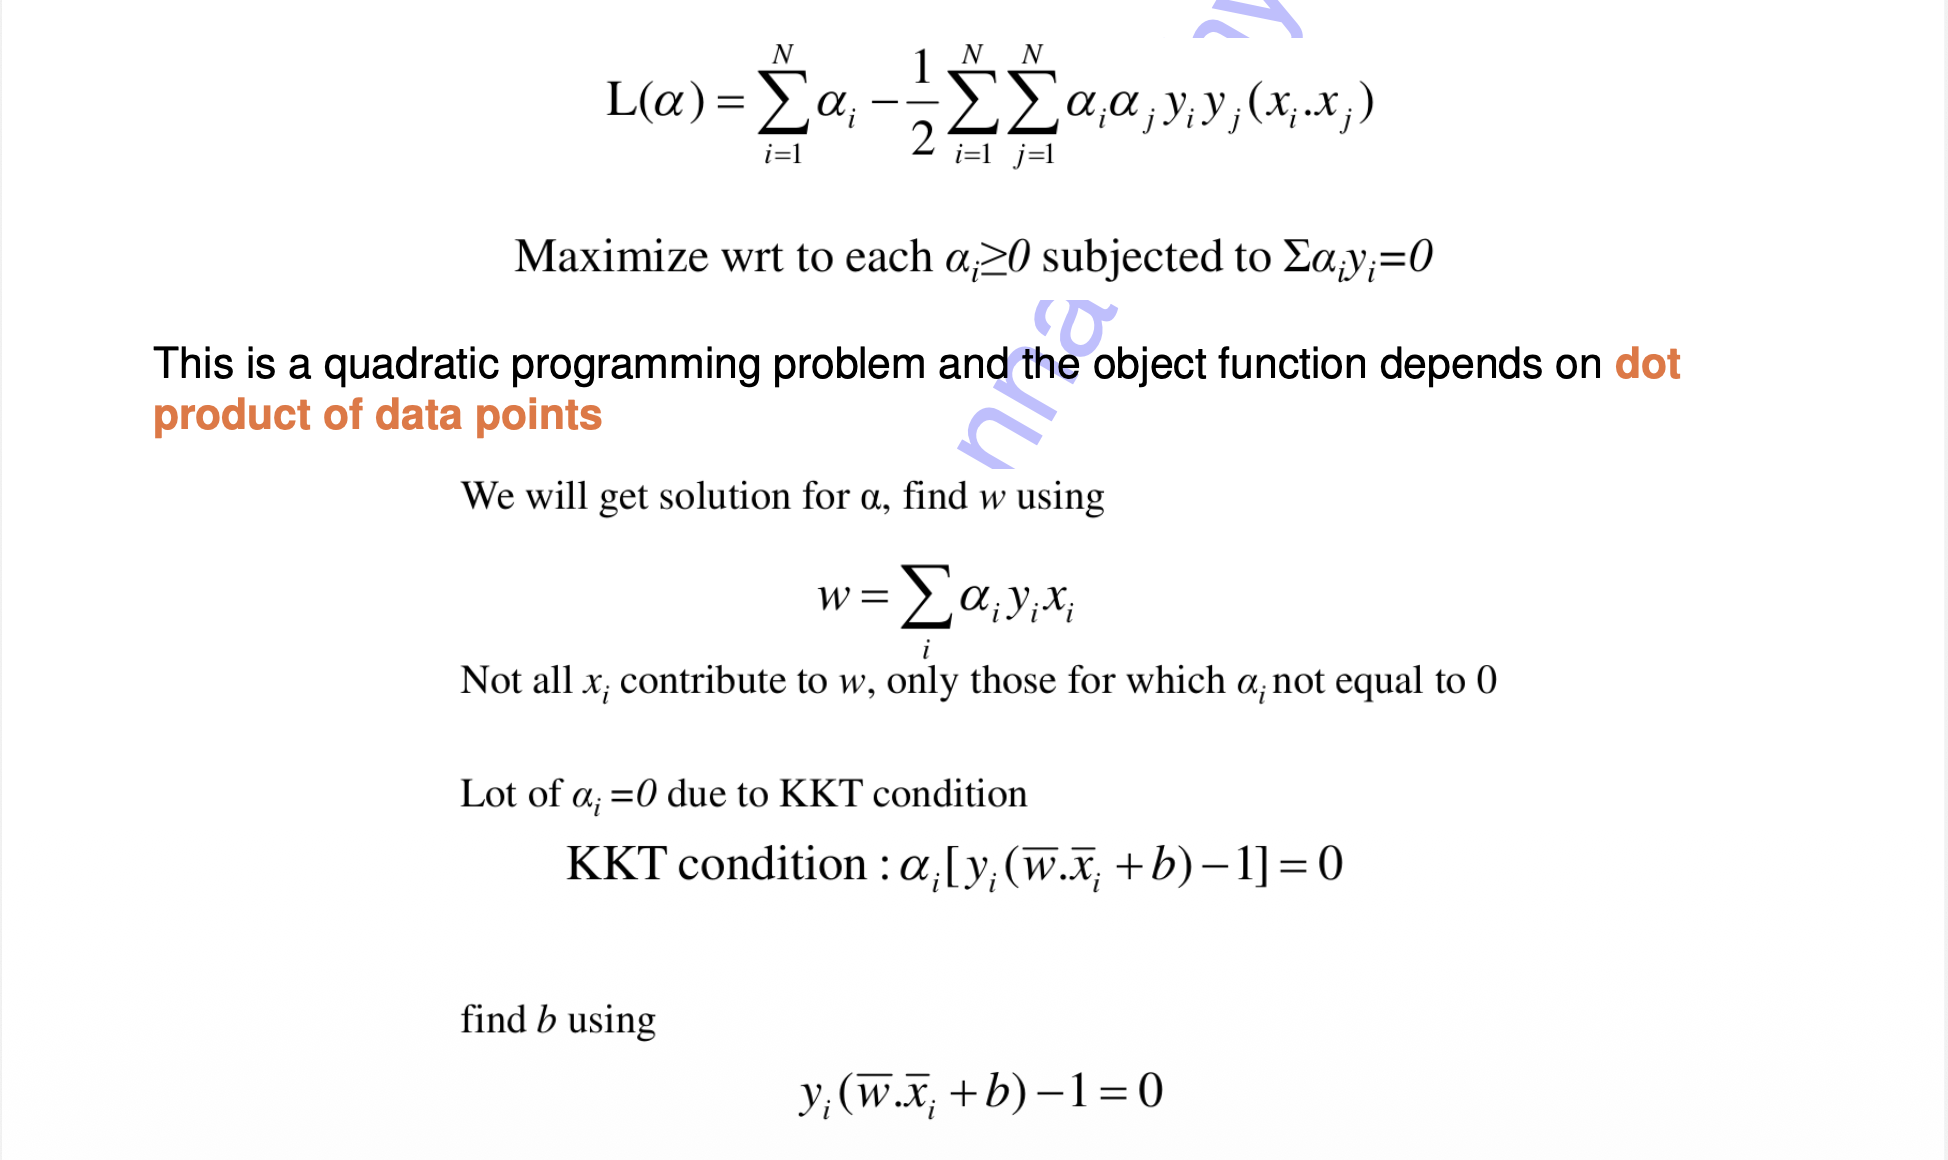

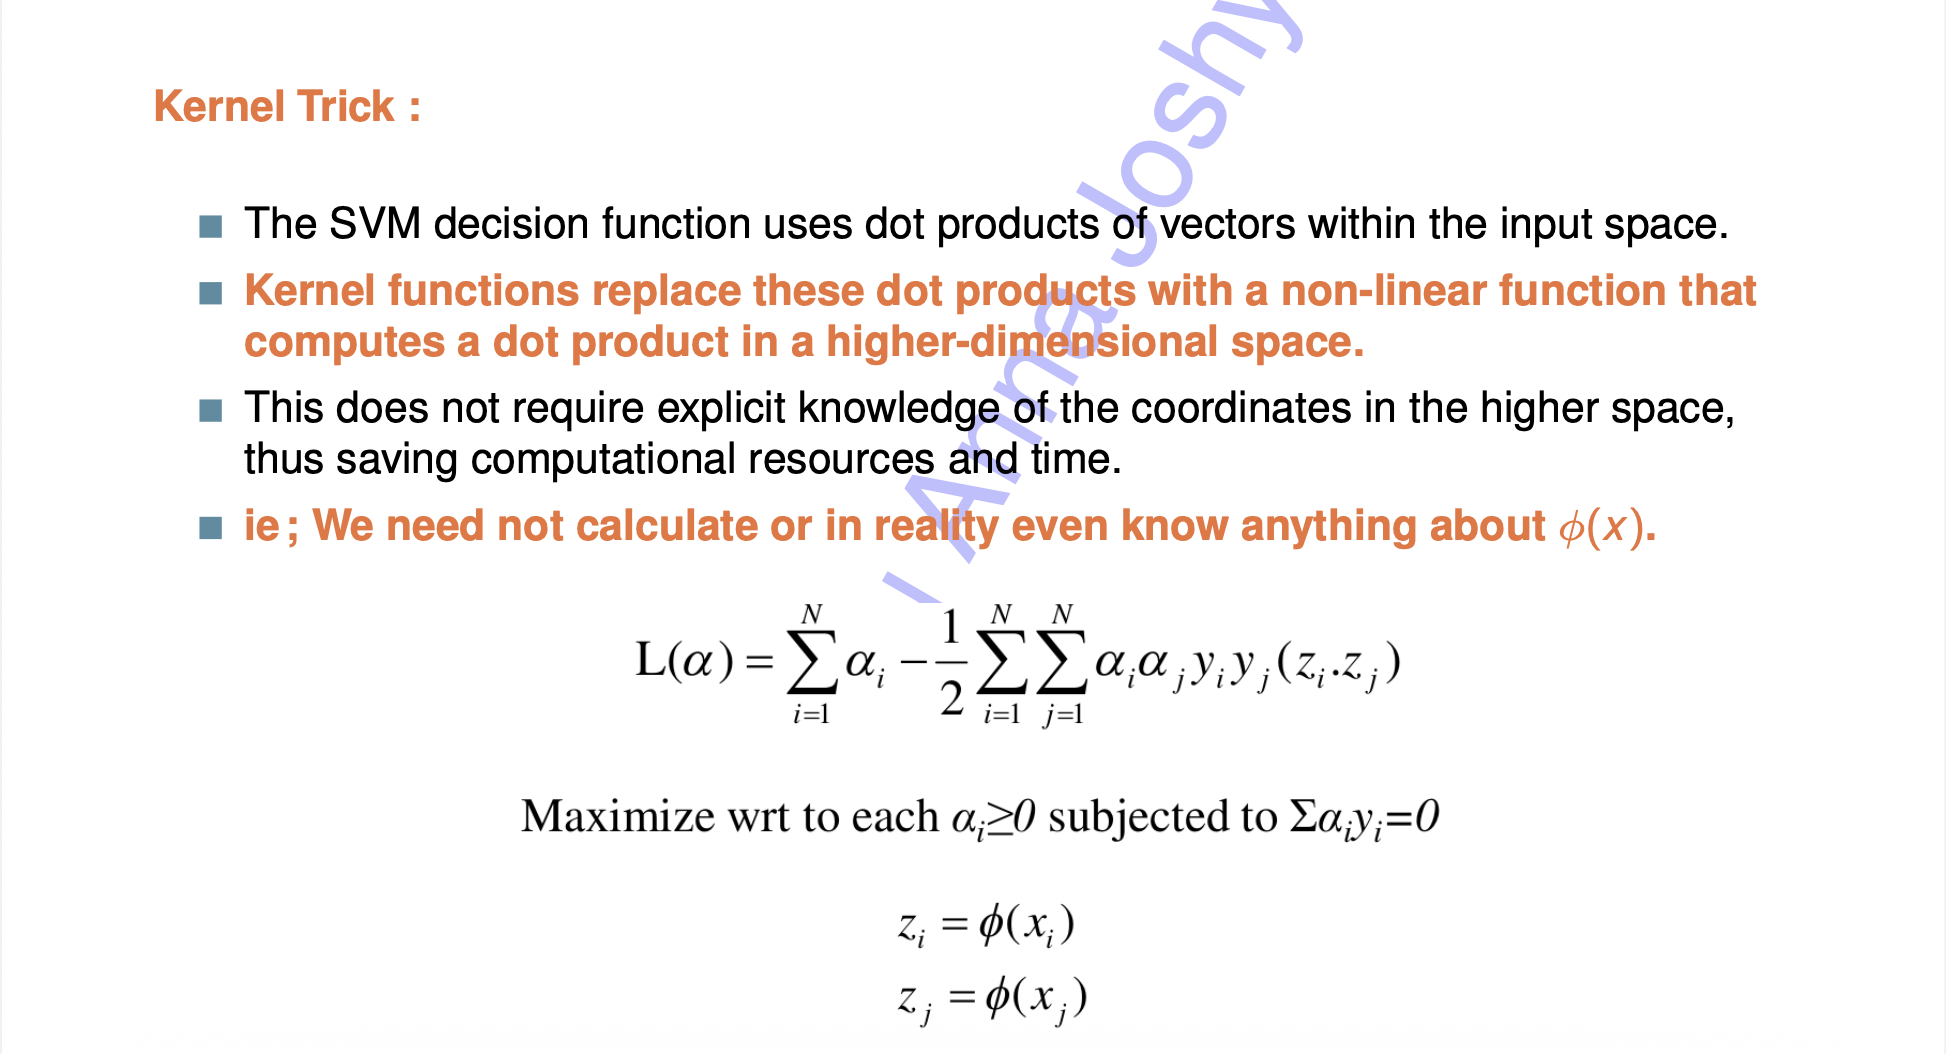

### **Commonly used Kernels:**

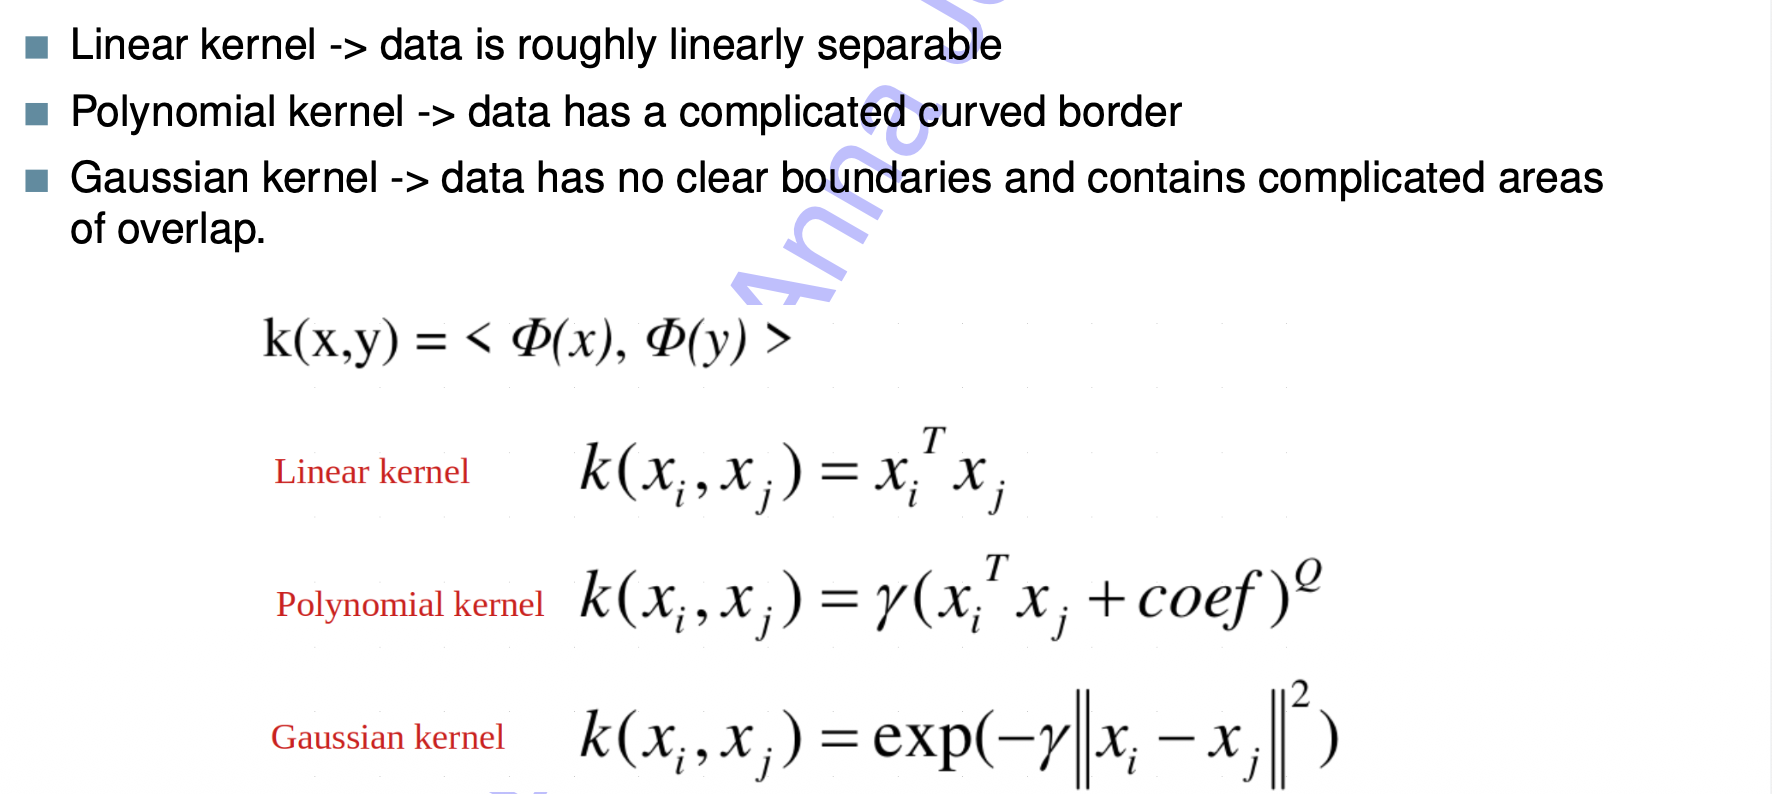

- There is no best kernel; it depends on the data.

- Linear kernel → use when data is roughly linear or very high-dimensional.

- Polynomial kernel → use when feature interactions are expected.


- RBF kernel → default choice when the boundary is non-linear and unknown.

- Always start simple (linear) and move to RBF if underfitting.

- The parameter 'gamma' in RBF kernel is important as it determines the shape of the decision boundary: width of the Gaussian function
- Small gamma => creates a broader Gaussian with a smoother peak, resulting in a
simple decision boundary that generalizes well on new data.
- Too small => underfitting
- Larger gamma => creates narrow Gaussian with a sharp peak around each
example, leading to a complex decision boundary that can adapt well to complex
datasets.
- Too large => overfitting
- Selecting an appropriate value for gamma is crucial to building a robust
SVM model.

### **SVM for Circles dataset**

In [ ]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate circles dataset that is non-linear
X, y = make_circles(n_samples=600, noise=0.1, factor=0.4, random_state=42)

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c = y, edgecolors="k")
plt.title("Circles dataset")

In [ ]:
from sklearn.svm import SVC

# Train SVMs

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# svm with linear kernel
svm_linear = SVC(kernel="linear").fit(X_train, y_train)

# svm with gaussian kernel (rbf)
# gamma="scale" by default, can be changed to "auto", but may overfit if data variance is small
svm_rbf = SVC(kernel="rbf", gamma="scale").fit(X_train, y_train)

# Test results
print("Linear SVM:", svm_linear.score(X_test, y_test))
print("RBF SVM:", svm_rbf.score(X_test, y_test))

In [ ]:
# with polynomial kernel

svm_2 = SVC(kernel="poly", degree=2).fit(X_train, y_train)
svm_3 = SVC(kernel="poly", degree=3).fit(X_train, y_train)

# Test results
print("SVM with 2nd degree polynomial kernel:", svm_2.score(X_test, y_test))
print("SVM with 3rd degree polynomial kernel:", svm_3.score(X_test, y_test))

In [ ]:
# Meshgrid for decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_test[:,0].min()-1, X_test[:,0].max()+1, 200),
    np.linspace(X_test[:,1].min()-1, X_test[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Plot
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.contourf(xx, yy, svm_linear.predict(grid).reshape(xx.shape), alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, edgecolors="k")
plt.title("Linear SVM - no separting plane")

plt.subplot(1,2,2)
plt.contourf(xx, yy, svm_rbf.predict(grid).reshape(xx.shape), alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, edgecolors="k")
plt.title("RBF Kernel SVM - found separating plane")

plt.show()